In [2]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!ls -lh *csv

-rw-rw-r-- 1 oem oem 5.8K Jun 30 19:04 compare_sgp_and_fcsgp_kld.csv
-rw-rw-r-- 1 oem oem  835 Jun 23 00:30 coords_to_use.csv
-rw-rw-r-- 1 oem oem 5.7K Jul 19 15:34 fc_sgp_params_and_metrics.csv
-rw-rw-r-- 1 oem oem  38K Jul 20 10:00 fc_sgp_radprof_params_and_metrics.csv
-rw-rw-r-- 1 oem oem 6.8K Jul 19 19:59 rl_params_and_metrics.csv
-rw-rw-r-- 1 oem oem  40K Jul 20 10:00 rl_radprof_params_and_metrics.csv
-rw-rw-r-- 1 oem oem 5.6K Jul 19 15:28 sgp_params_and_metrics.csv
-rw-rw-r-- 1 oem oem  38K Jul 20 09:59 sgp_radprof_params_and_metrics.csv
-rw-rw-r-- 1 oem oem 249K Jun  3 17:25 standard_stars.csv


In [4]:
df = pd.read_csv('fc_sgp_radprof_params_and_metrics.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.columns = ["image", "original_radprof", "orig_fitted_data", "radprof", "fitted_data", "w_before", "w_after", "param_errs"]
df

,image,original_radprof,orig_fitted_data,radprof,fitted_data,w_before,w_after,param_errs
0,FC_SGP_original_images/ccfbue110099.fits_327.3...,"[2661.453857421875, 2389.950917561849, 1812.79...","[2702.227100994601, 2312.849598326655, 1815.75...","[8776.953515114032, 6010.864547432253, 3265.41...","[8744.99994216134, 6136.717082781143, 3055.012...",29.743321,34.416963,[2.04166072e+02 1.09104058e-01 6.12216919e-02]
1,FC_SGP_original_images/ccfbvc170118.fits_178.2...,"[-7.667520523071289, -0.834521484375, -5.92786...","[0.5351643059967571, 1.6269599714766063, 4.148...","[632.4333713589443, 518.1654075172125, 377.055...","[630.6695190509918, 523.1129557438369, 372.935...",7.643145,1.094514,[4.34514284 0.04597727 0.025339 ]
2,FC_SGP_original_images/ccfbvc170118.fits_474.0...,"[128.08434549967447, 129.57171630859375, 116.6...","[135.02127382681465, 121.6456314343349, 107.42...","[619.3474257752661, 429.84942014072124, 278.16...","[618.163031358585, 432.32997867451644, 279.246...",3.060219,1.459754,[77.52405001 0.3159468 0.10170315]
3,FC_SGP_original_images/ccfbvc170118.fits_485.6...,"[1316.6522216796875, 1253.9250549316407, 1138....","[1391.398139215339, 1214.444975746575, 1042.99...","[3515.5246408818275, 3415.5006978306687, 2417....","[3567.662274260454, 3276.979592893592, 2520.17...",48.562730,23.568728,[45.38509765 0.10506214 0.07259492]
4,FC_SGP_original_images/ccfbvc170119.fits_226.8...,"[99.3733139038086, 98.95486450195312, 96.67565...","[102.27682898429433, 99.01993593471542, 90.616...","[242.75983408082197, 208.09581592885695, 159.8...","[241.0757499759983, 210.32714690318136, 162.53...",2.642197,1.431427,[4.29156621 0.14197015 0.08141424]
5,FC_SGP_original_images/ccfbvc170119.fits_297.1...,"[277.53904215494794, 221.8002596768466, 184.78...","[277.8563039930622, 225.00992317612796, 181.53...","[762.4548150031583, 602.817831979869, 397.0653...","[764.1097760645575, 594.6083515198095, 410.859...",3.241198,2.944666,[27.65506609 0.18483168 0.0839526 ]
6,FC_SGP_original_images/ccfbvc170119.fits_515.4...,"[625.0724283854166, 599.6540260314941, 546.640...","[656.1460879434147, 584.2860914198742, 512.198...","[1532.917859653501, 1328.445321775822, 1126.57...","[1510.0780709293265, 1380.3910536856804, 1097....",14.339327,11.255088,[21.74258469 0.12766391 0.08304602]
7,FC_SGP_original_images/ccfbvc170120.fits_266.2...,"[2094.3375854492188, 1992.3394317626953, 1891....","[2099.1211118667316, 2023.0415632453708, 1889....","[5282.899952142116, 4752.499218489401, 3742.91...","[5249.477511445857, 4804.969754154838, 3772.86...",77.876709,27.308601,[43.7168658 0.07197834 0.04790502]
8,FC_SGP_original_images/ccfbvc170120.fits_484.9...,"[147.5408935546875, 155.16734619140624, 172.46...","[146.0905712012178, 160.2397767217082, 166.246...","[499.84656543025665, 427.43904693015963, 381.9...","[492.29452100373885, 446.6283580274015, 369.48...",5.580855,2.550573,[8.56111631 0.16492409 0.09686532]
9,FC_SGP_original_images/ccfbvc170121.fits_178.0...,"[335.6263122558594, 308.3844223022461, 286.361...","[334.69857524938635, 313.3751496801332, 284.47...","[776.5270868608211, 681.0271997790356, 522.140...","[778.2899321823438, 677.0721233215662, 522.235...",4.239202,1.857111,[6.15145984 0.06244849 0.03552674]


In [24]:
df.iloc[5], df.iloc[3], df.iloc[4]

(image               FC_SGP_original_images/ccfbvc170119.fits_297.1...
 original_radprof    [277.53904215494794, 221.8002596768466, 184.78...
 orig_fitted_data    [274.74165217607754, 228.65345069439127, 185.0...
 radprof             [762.4548150031583, 602.817831979869, 397.0653...
 fitted_data         [764.0960172588212, 594.6737810699385, 410.867...
 w_before                                                     2.421377
 w_after                                                       2.95106
 param_errs                                                        NaN
 Name: 5, dtype: object,
 image               FC_SGP_original_images/ccfbvc170118.fits_485.6...
 original_radprof    [1316.6522216796875, 1253.9250549316407, 1138....
 orig_fitted_data    [1302.9061096822973, 1280.8250470822725, 1122....
 radprof             [3515.5246408818275, 3415.5006978306687, 2417....
 fitted_data         [3542.450972013643, 3330.73729347323, 2515.818...
 w_before                                           

In [25]:
df.iloc[5]['image'], df.iloc[3]['image'], df.iloc[4]['image']

('FC_SGP_original_images/ccfbvc170119.fits_297.1877_311.5624_SGP_orig.fits',
 'FC_SGP_original_images/ccfbvc170118.fits_485.6476_528.831_SGP_orig.fits',
 'FC_SGP_original_images/ccfbvc170119.fits_226.8246_174.0645_SGP_orig.fits')

In [26]:
df.iloc[5]["radprof"]

'[762.4548150031583, 602.817831979869, 397.0653304344064, 255.65722228033104, 148.70360135642517, 65.36211434119235, 19.501510511369116, 4.243794910609942, 0.9969088200761519, 0.3512168987394814, 0.31115570037952744, 0.31115570037952744, 0.3111557003795273, 0.3111557003795273, 0.3111557003795272, 0.31115570037952733, 0.3111557003795279, 0.31115570037952783, 0.3111557003795278, 0.31115570037952767, 0.31115570037952767]'

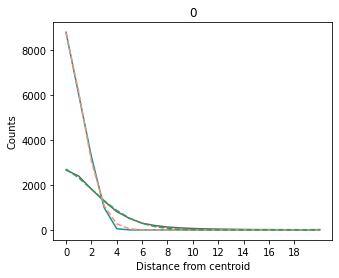

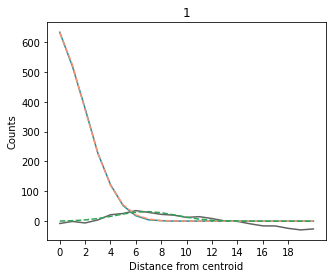

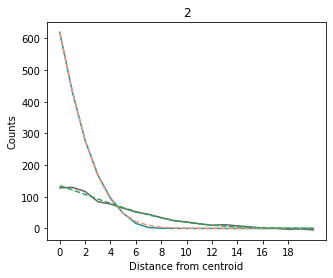

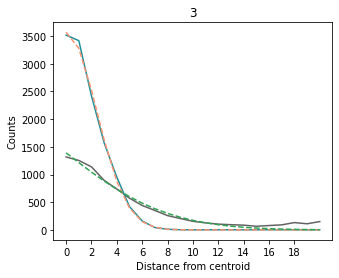

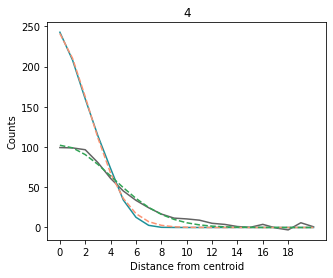

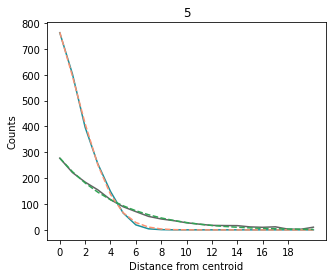

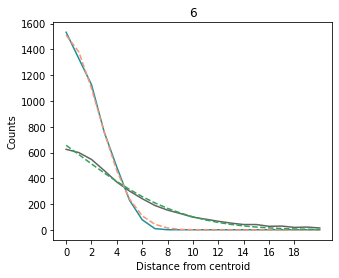

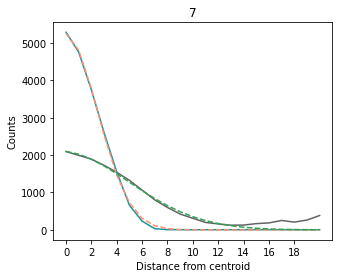

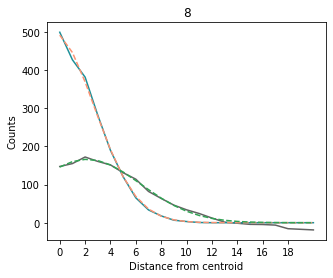

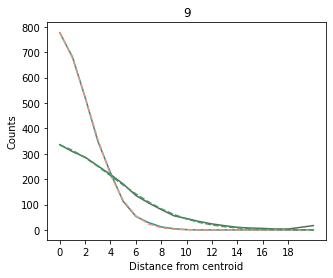

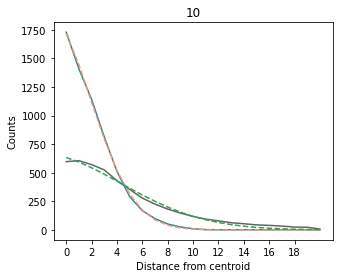

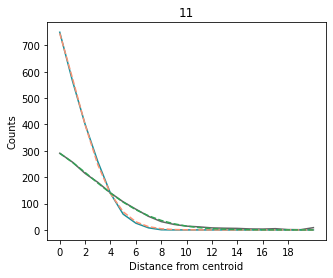

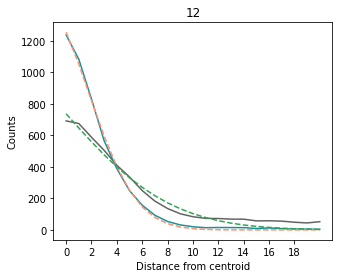

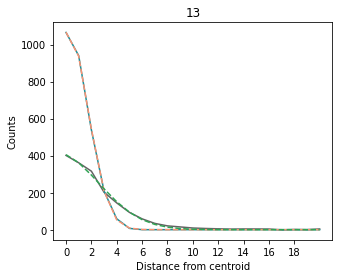

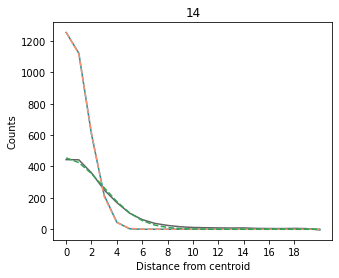

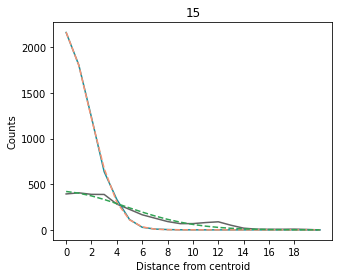

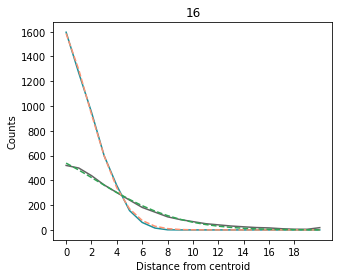

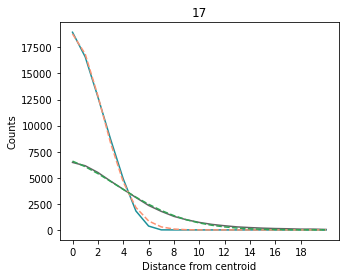

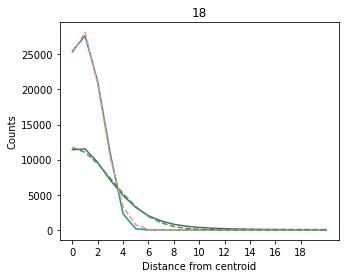

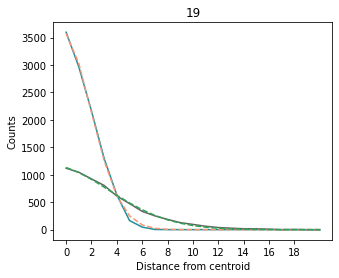

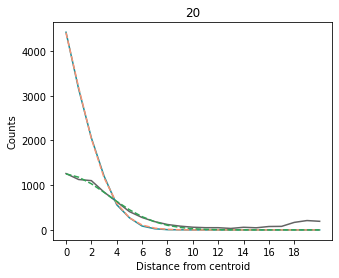

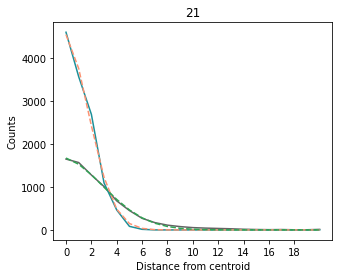

In [6]:
for i in range(df.shape[0]):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    ax.plot(ast.literal_eval(df.iloc[i]["original_radprof"]), c='#636363', label='original');
    ax.plot(ast.literal_eval(df.iloc[i]["radprof"]), c='#1C9099', label='reconstructed');
    ax.plot(ast.literal_eval(df.iloc[i]["fitted_data"]), c='#FC9272', linestyle='--', label='recon_fit');
    ax.plot(ast.literal_eval(df.iloc[i]["orig_fitted_data"]), c='#31a354', linestyle='--', label='orig_fit');
    ax.set_xticks(ticks=np.arange(0, 20, 2));
    ax.set_ylabel("Counts");
    ax.set_xlabel("Distance from centroid");
    ax.set_title(f'{i}')
    plt.show()

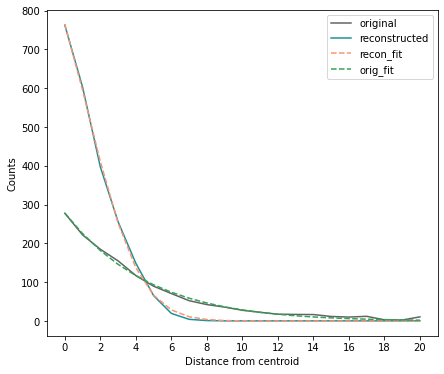

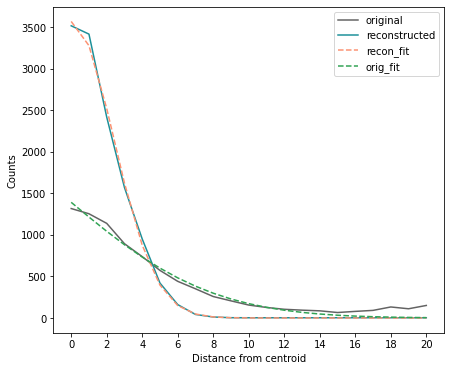

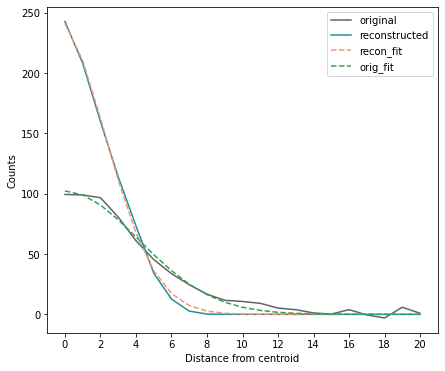

In [8]:
# df.iloc[0], df.iloc[1], df.iloc[27]

# colors = ["#7aa0c4", "#ca82e1", "#8bcd50"]

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ax.plot(ast.literal_eval(df.iloc[5]["original_radprof"]), c='#636363', label='original');
ax.plot(ast.literal_eval(df.iloc[5]["radprof"]), c='#1C9099', label='reconstructed');
ax.plot(ast.literal_eval(df.iloc[5]["fitted_data"]), c='#FC9272', linestyle='--', label='recon_fit');
ax.plot(ast.literal_eval(df.iloc[5]["orig_fitted_data"]), c='#31a354', linestyle='--', label='orig_fit');
ax.set_xticks(ticks=np.arange(0, 22, 2));
ax.set_ylabel("Counts");
ax.set_xlabel("Distance from centroid");

plt.legend();
plt.savefig("radprof_5.png", bbox_inches='tight', dpi=500)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ax.plot(ast.literal_eval(df.iloc[3]["original_radprof"]), c='#636363', label='original');
ax.plot(ast.literal_eval(df.iloc[3]["radprof"]), c='#1C9099', label='reconstructed');
ax.plot(ast.literal_eval(df.iloc[3]["fitted_data"]), c='#FC9272', linestyle='--', label='recon_fit');
ax.plot(ast.literal_eval(df.iloc[3]["orig_fitted_data"]), c='#31a354', linestyle='--', label='orig_fit');
ax.set_xticks(ticks=np.arange(0, 22, 2));
ax.set_ylabel("Counts");
ax.set_xlabel("Distance from centroid");
plt.legend();
plt.savefig("radprof_3.png", bbox_inches='tight', dpi=500)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ax.plot(ast.literal_eval(df.iloc[4]["original_radprof"]), c='#636363', label='original');
ax.plot(ast.literal_eval(df.iloc[4]["radprof"]), c='#1C9099', label='reconstructed');
ax.plot(ast.literal_eval(df.iloc[4]["fitted_data"]), c='#FC9272', linestyle='--', label='recon_fit');
ax.plot(ast.literal_eval(df.iloc[4]["orig_fitted_data"]), c='#31a354', linestyle='--', label='orig_fit');
ax.set_xticks(ticks=np.arange(0, 22, 2));
ax.set_ylabel("Counts");
ax.set_xlabel("Distance from centroid");
plt.legend();
plt.savefig("radprof_4.png", bbox_inches='tight', dpi=500)

In [5]:
sum(df["w_before"] > df["w_after"])

18

In [10]:
!ls -lh radprof*png

-rw-rw-r-- 1 oem oem 302K Jun 29 16:52 radprof_15.png
-rw-rw-r-- 1 oem oem 302K Jun 29 16:53 radprof_20.png
-rw-rw-r-- 1 oem oem 244K Jul 12 11:21 radprof_3.png
-rw-rw-r-- 1 oem oem 230K Jul 12 11:21 radprof_4.png
-rw-rw-r-- 1 oem oem 229K Jul 12 11:21 radprof_5.png
